In [1]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np

import matplotlib.pyplot as plt
import save_and_load
import csv_decoder
import function as fn
import importlib
import time
from sklearn.datasets import make_hastie_10_2
import pandas as pd
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn import preprocessing
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
import os

In [2]:
my_data_file_path = './High_Level_Features/higgs_highlevelfeatures_test.csv'
# # read the data and store data in DataFrame
my_data = pd.read_csv(my_data_file_path)

totallist = ["higgs_pt","higgs_eta","higgs_m",
           "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
          # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
           "girth","CIJS","SIJS","DeltaEta",
           "weight","isGGH","isVBF","isVH","isttH","eventindex"]


features = [#"higgs_pt","higgs_eta","higgs_m",
#        "non_higgs_leading_pt",
        "non_higgs_leading_eta","non_higgs_leading_m",
      # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
       "girth","CIJS","SIJS","DeltaEta"
            ]

my_data["target"] = my_data["isGGH"]
my_data["target"] = my_data["target"]+my_data["isVBF"]+my_data["isVBF"]
my_data["target"] = my_data["target"]+my_data["isVH"]+my_data["isVH"]+my_data["isVH"]
my_data["target"] = my_data["target"]+my_data["isttH"]+my_data["isttH"]+my_data["isttH"]+my_data["isttH"]
# print(len(my_data))


if os.path.exists("./BDT_Model_for_test") == 0:
    os.mkdir("./BDT_Model_for_test")
    path = "./BDT_Model_for_test/"
else:
    path = "./BDT_Model_for_test/"

counter = 0
for i, filename in enumerate(os.listdir(path)):
    if filename == "Data_train.csv" :
        counter += 1 
    elif filename == "Data_val.csv" :
        counter += 1 
    elif filename == "Data_test.csv" :
        counter += 1 
    

if counter == 0:
    ggH = shuffle(my_data[my_data["target"]==1])
    VBF = shuffle(my_data[my_data["target"]==2])
    VH = shuffle(my_data[my_data["target"]==3])
    ttH = shuffle(my_data[my_data["target"]==4])
    
#     ggH_train = ggH[:170000]
#     VBF_train = VBF[:170000]
#     VH_train = VH[:170000]
#     ttH_train = ttH[:170000]
    
#     ggH_val = ggH[170000:195000]
#     VBF_val = VBF[170000:195000]
#     VH_val = VH[170000:195000]
#     ttH_val = ttH[170000:195000]
    
#     ggH_test = ggH[195000:220000]
#     VBF_test = VBF[195000:220000]
#     VH_test = VH[195000:220000]
#     ttH_test = ttH[195000:220000]
    
    
    ggH_train = ggH[:229000]
    VBF_train = VBF[:229000]
    VH_train = VH[:229000]
    ttH_train = ttH[:229000]
    
    ggH_val = ggH[229000:229001]
    VBF_val = VBF[229000:229001]
    VH_val = VH[229000:229001]
    ttH_val = ttH[229000:229001]
    
    ggH_test = ggH[229001:22902]
    VBF_test = VBF[229001:22902]
    VH_test = VH[229001:22902]
    ttH_test = ttH[229001:22902]
    
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("total #",len(ggH),len(VBF),len(VH),len(ttH)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Val #",len(ggH_val),len(VBF_val),len(VH_val),len(ttH_val)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))
    
    Data_train, Data_val, Data_test = ggH_train, ggH_val, ggH_test
    
    for element in [VBF_train,VH_train,ttH_train]:
        Data_train = pd.concat([Data_train,element],ignore_index=True,axis=0,join='inner')
        
    for element in [VBF_val,VH_val,ttH_val]:
        Data_val = pd.concat([Data_val,element],ignore_index=True,axis=0,join='inner')
        
    for element in [VBF_test,VH_test,ttH_test]:
        Data_test = pd.concat([Data_test,element],ignore_index=True,axis=0,join='inner')
    
    Data_train.to_csv(path + "Data_train.csv",index = 0)
    Data_val.to_csv(path + "Data_val.csv",index = 0)
    Data_test.to_csv(path + "Data_test.csv",index = 0)
    
    
    
if counter == 3:
    
    Data_train = pd.read_csv(path + "Data_train.csv")
    Data_val = pd.read_csv(path + "Data_val.csv")
    Data_test = pd.read_csv(path + "Data_test.csv")
    
    ggH_train = Data_train[Data_train["isGGH"]==1]
    ggH_val = Data_val[Data_val["isGGH"]==1]
    ggH_test = Data_test[Data_test["isGGH"]==1]
    
    VBF_train = Data_train[Data_train["isVBF"]==1]
    VBF_val = Data_val[Data_val["isVBF"]==1]
    VBF_test = Data_test[Data_test["isVBF"]==1]
    
    VH_train = Data_train[Data_train["isVH"]==1]
    VH_val = Data_val[Data_val["isVH"]==1]
    VH_test = Data_test[Data_test["isVH"]==1]
    
    ttH_train = Data_train[Data_train["isttH"]==1]
    ttH_val = Data_val[Data_val["isttH"]==1]
    ttH_test = Data_test[Data_test["isttH"]==1]

    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Val #",len(ggH_val),len(VBF_val),len(VH_val),len(ttH_val)))
    print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))




X_train = Data_train[features]
Y_train = Data_train["target"]
X_test = Data_test[features]
Y_test = Data_test["target"]

print("\n")
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train),len(X_test),len(Y_train),len(Y_test)))

          ggH     VBF      VH     ttH   
Train #  229000  229000  229000  229000 
 Val #     1       1       1       1    
 Test #    0       0       0       0    


         Xtrain  Xtest   Ytrain  Ytest  
Train #  916000    0     916000    0    


# Study the Performance of BDT

In [2]:
features = [#"higgs_pt","higgs_eta","higgs_m",
#        "non_higgs_leading_pt",
        "non_higgs_leading_eta","non_higgs_leading_m",
      # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
       "girth","CIJS","SIJS","DeltaEta"
            ]
path_train = "./BDT_Model/"
path_test = "./BDT_Model_for_test/"
Data_train = pd.read_csv(path_train + "Data_train.csv")
Data_test = pd.read_csv(path_test + "Data_train.csv")


pre_2CNN = np.load("./2CNN_Model_for_test/2CNN_pre.npy")


Data_train["PTH"],Data_train["evtweight"] = Data_train["higgs_pt"],Data_train["weight"]
Data_test["PTH"],Data_test["evtweight"] = Data_test["higgs_pt"],Data_test["weight"]
Data_test["pre_2CNN_out1"],Data_test["pre_2CNN_out2"] = pre_2CNN[:,0], pre_2CNN[:,1]
Data_test["pre_2CNN_out3"],Data_test["pre_2CNN_out4"] = pre_2CNN[:,2], pre_2CNN[:,3]

# Data_train = Data_train[Data_train["higgs_pt"] > 800]
# Data_test = Data_test[Data_test["higgs_pt"] > 800]

ggH_train = Data_train[Data_train["isGGH"]==1]
ggH_test = Data_test[Data_test["isGGH"]==1]

VBF_train = Data_train[Data_train["isVBF"]==1]
VBF_test = Data_test[Data_test["isVBF"]==1]

VH_train = Data_train[Data_train["isVH"]==1]
VH_test = Data_test[Data_test["isVH"]==1]

ttH_train = Data_train[Data_train["isttH"]==1]
ttH_test = Data_test[Data_test["isttH"]==1]


print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","ggH","VBF","VH","ttH"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(ggH_train),len(VBF_train),len(VH_train),len(ttH_train)))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Test #",len(ggH_test),len(VBF_test),len(VH_test),len(ttH_test)))


X_train = Data_train[features]
Y_train = Data_train["target"]
X_test = Data_test[features]
Y_test = Data_test["target"]
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train),len(X_test),len(Y_train),len(Y_test)))


importlib.reload(fn)
ggh_weight_train = fn.Weight(ggH_train, "ggF", index=2)
vbf_weight_train = fn.Weight(VBF_train, "VBF", index=2)
vh_weight_train = fn.Weight(VH_train, "VH", index=2)
tth_weight_train = fn.Weight(ttH_train, "ttH", index=2)
production_weight_train = [ggh_weight_train,vbf_weight_train,vh_weight_train,tth_weight_train]

ggh_weight_test = fn.Weight(ggH_test, "ggF", index=2)
vbf_weight_test = fn.Weight(VBF_test, "VBF", index=2)
vh_weight_test = fn.Weight(VH_test, "VH", index=2)
tth_weight_test = fn.Weight(ttH_test, "ttH", index=2)
production_weight_test = [ggh_weight_test,vbf_weight_test,vh_weight_test,tth_weight_test]

Xection_train = np.zeros((4,len(ggh_weight_train[2])))
Xection_test = np.zeros((4,len(ggh_weight_test[2])))
for i, element in enumerate(production_weight_train):
    Xection_train[i,:] = element[2]
for i, element in enumerate(production_weight_test):
    Xection_test[i,:] = element[2]

Xection_train_other = vbf_weight_train[2][0]+vh_weight_train[2][0]+tth_weight_train[2][0]
Xection_test_other = vbf_weight_test[2][0]+vh_weight_test[2][0]+tth_weight_test[2][0]

data_train = pd.concat([ggH_train,VBF_train[:int(170000*vbf_weight_train[2][0]/Xection_train_other)]],ignore_index=True,axis=0,join='inner')
data_train = pd.concat([data_train,VH_train[:int(170000*vh_weight_train[2][0]/Xection_train_other)]],ignore_index=True,axis=0,join='inner')
data_train = pd.concat([data_train,ttH_train[:int(170000*tth_weight_train[2][0]/Xection_train_other)]],ignore_index=True,axis=0,join='inner')

data_test = pd.concat([ggH_test,VBF_test[:int(229000*vbf_weight_test[2][0]/Xection_test_other)]],ignore_index=True,axis=0,join='inner')
data_test = pd.concat([data_test,VH_test[:int(229000*vh_weight_test[2][0]/Xection_test_other)]],ignore_index=True,axis=0,join='inner')
data_test = pd.concat([data_test,ttH_test[:int(229000*tth_weight_test[2][0]/Xection_test_other)]],ignore_index=True,axis=0,join='inner')

# print(len(data_train),len(data_test))

X_train_weighted = data_train[features]
Y_train_weighted = data_train["target"]
X_test_weighted = data_test[features]
Y_test_weighted = data_test["target"]

print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Weighted","Xtrain","Xtest","Ytrain","Ytest"))
print("{:^8}{:^8}{:^8}{:^8}{:^8}".format("Train #",len(X_train_weighted),len(X_test_weighted),len(Y_train_weighted),len(Y_test_weighted)))



          ggH     VBF      VH     ttH   
Train #  170000  170000  170000  170000 
 Test #  229000  229000  229000  229000 
         Xtrain  Xtest   Ytrain  Ytest  
Train #  680000  916000  680000  916000 
Weighted Xtrain  Xtest   Ytrain  Ytest  
Train #  339999  457998  339999  457998 


In [3]:
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################
path = "./BDT_Model/"
GBDT, Ada = 0, 0
for i, filename in enumerate(os.listdir(path)):
    if filename == "clf_GBDT.h5" :
        GBDT += 1 
    elif filename == "clf_Ada.h5" :
        Ada += 1 

if GBDT == 0:
    rand = np.random.randint(1000000)
    # clf_1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, max_depth=1, random_state=0).fit(X,Y)
    clf_GBDT = GradientBoostingClassifier(
                n_estimators=500,
                learning_rate=0.3,
                max_depth=2, 
                min_samples_split = 0.25,
                min_samples_leaf = 0.05,
    #             min_impurity_split = 0.00001,
    #             validation_fraction = 0.1,
                random_state= rand,  #np.random,
                verbose = 1
                )
    clf_GBDT.fit(X_train,Y_train)
    dump(clf_GBDT, path+"clf_GBDT.h5")
    
ticks_2 = time.time()
    
if Ada == 0:
    clf_Ada = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2),
            n_estimators=500,
            learning_rate=1)
    
    clf_Ada.fit(X_train,Y_train)
    dump(clf_Ada, path+"clf_Ada.h5")

if GBDT == 1:
    clf_GBDT = load(path+"clf_GBDT.h5")
    
if Ada == 1:
    clf_Ada = load(path+"clf_Ada.h5")

############################################################################################################################################################
ticks_3 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime consumption : {:.4f} min for GBDT\033[0;m".format(totaltime/60.))
totaltime =  ticks_3 - ticks_2
print("\033[3;33mTime consumption : {:.4f} min for AdaBDT\033[0;m".format(totaltime/60.))


Tue Jun 30 00:53:03 2020
Time consumption : 0.0000 min for GBDT
Time consumption : 0.0040 min for AdaBDT


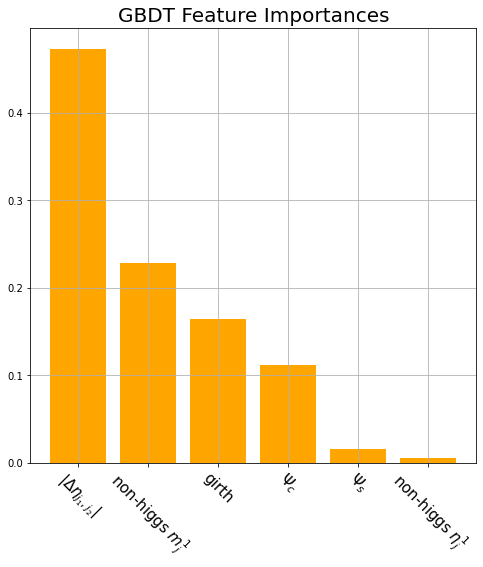

In [10]:
namelist = [#"higgs $Pt_{j}$","higgs $\eta_{j}$","higgs $m_{j}$",
#         "non-higgs $Pt^1_{j}$",
        "non-higgs $\eta^1_{j}$","non-higgs $m^1_{j}$",
        #"non-higgs $Pt^2_{j}$","non-higgs $\eta^2_{j}$","non-higgs $m^2_{j}$",
        "girth","$\Psi_c$","$\Psi_s$","$|\Delta\eta_{j_1, j_2}|$"]

importances = clf_GBDT.feature_importances_
# std = np.std([tree.feature_importances_ for tree in clf_GBDT.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]
namelist_inorder = []
for i in indices:
    namelist_inorder.append(namelist[i])


plt.figure(figsize=(8,8))
plt.title("GBDT Feature Importances",fontsize=20)

plt.bar(range(X_train.shape[1]), 
         importances[indices],
         color="orange", 
#          yerr=std[indices], 
         align="center")
plt.grid(True)
plt.xticks(range(X_train.shape[1]), namelist_inorder, rotation= -45,fontsize=15)
# plt.xlim([-1, X_train.shape[1]])
plt.show()

[[141603  26277  24076  37044]
 [ 24520 184647  15660   4173]
 [ 29687  14207 161725  23381]
 [ 29070   3296  15550 181084]]
          ggH ratio VBF ratio VH ratio ttH ratio ggH eff.  VBF eff.   VH eff.  ttH eff. 
ggH-like   62.97    10.90    13.20     12.93     61.84     10.71     12.96     12.69  
VBF-like   11.50    80.83     6.22     1.44      11.47     80.63     6.20      1.44   
VH-like    11.09     7.22    74.52     7.17      10.51     6.84      70.62     6.79   
ttH-like   15.08     1.70     9.52     73.71     16.18     1.82      10.21     79.08  


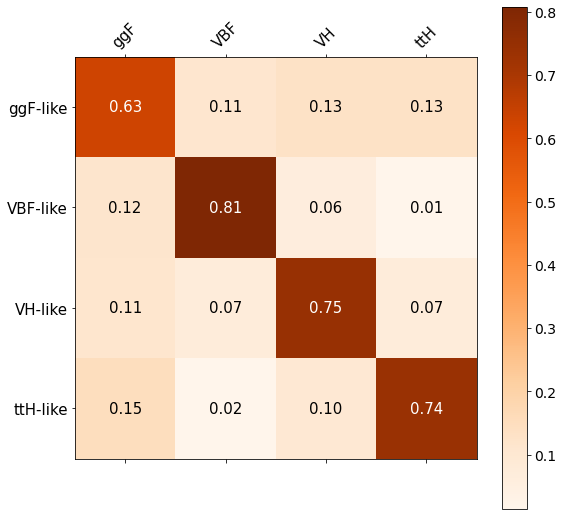

In [26]:
# confusion = confusion_matrix(Y_test, clf_GBDT.predict(X_test))

confusion = confusion_matrix(Y_test-1, np.argmax(pre_2CNN,axis=1))

# confusion = confusion_matrix(Y_test, clf_Ada.predict(X_test))
print(confusion)
ratio, eff = np.zeros(16), np.zeros(16)
k = 0
for i in range(4):
    for j in range(4):
        ratio[k] = (confusion[j][i]/np.sum(confusion,axis=0)[i])*100.
        eff[k] = (confusion[j][i]/np.sum(confusion,axis=1)[i])*100.
        k += 1

print("{:^8}  {:^8} {:^8} {:^8} {:^9} {:^9} {:^9} {:^9} {:^9}".format("","ggH ratio","VBF ratio","VH ratio","ttH ratio","ggH eff.","VBF eff.","VH eff.","ttH eff."))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("ggH-like",ratio[0],ratio[1],ratio[2],ratio[3],eff[0],eff[1],eff[2],eff[3]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("VBF-like",ratio[4],ratio[5],ratio[6],ratio[7],eff[4],eff[5],eff[6],eff[7]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("VH-like",ratio[8],ratio[9],ratio[10],ratio[11],eff[8],eff[9],eff[10],eff[11]))
print("{:^8}  {:^8.2f} {:^8.2f} {:^8.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f} {:^9.2f}".format("ttH-like",ratio[12],ratio[13],ratio[14],ratio[15],eff[12],eff[13],eff[14],eff[15]))
 
truelist = ["ggF","VBF","VH","ttH"]
likelist = ["ggF-like","VBF-like","VH-like","ttH-like"]

s = len(truelist)
f = plt.figure(figsize=(s+5, s+5))

confusion_ = np.array([[ ratio[0],ratio[1],ratio[2],ratio[3]],
                       [ ratio[4],ratio[5],ratio[6],ratio[7]],
                       [ ratio[8],ratio[9],ratio[10],ratio[11]],
                       [ ratio[12],ratio[13],ratio[14],ratio[15]]])/100.

plt.matshow(confusion_,fignum=f.number, cmap="Oranges")
plt.xticks(range(confusion_.shape[1]), truelist, fontsize=15, rotation=45)
plt.yticks(range(confusion_.shape[1]), likelist, fontsize=15)
plt.ylim((3.5,-0.5))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
for (i, j), z in np.ndenumerate(confusion_):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',fontsize=15,color=colors)
# plt.savefig("./Higgs_Pt/confusion_matrix_BDT.pdf", transparent=True)
plt.savefig("./Higgs_Pt/confusion_matrix_2CNN.pdf", transparent=True)
plt.show()

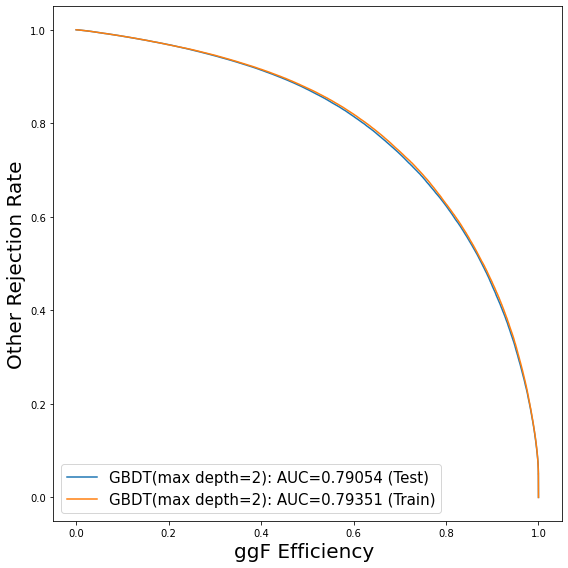

In [4]:
Weighted_event_Index = 0
axis = 0
if axis == 0:
    process = "ggF"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"

if Weighted_event_Index == 0:
    prediction_GBDT_test = clf_GBDT.predict_proba(X_test)
    prediction_GBDT_train = clf_GBDT.predict_proba(X_train)
elif Weighted_event_Index == 1:
    prediction_GBDT_test = clf_GBDT.predict_proba(X_test_weighted)
    prediction_GBDT_train = clf_GBDT.predict_proba(X_train_weighted)
    
# prediction_Ada_test = clf_Ada.predict_proba(X_test)
# prediction_Ada_train = clf_Ada.predict_proba(X_train)


Denominator_train = Xection_train[int((axis+1)%4),:]+ Xection_train[int((axis+2)%4),:]+ Xection_train[int((axis+3)%4),:]
Denominator_test = Xection_test[int((axis+1)%4),:]+ Xection_test[int((axis+2)%4),:]+ Xection_test[int((axis+3)%4),:]

discriminator_test = prediction_GBDT_test[:,axis]
discriminator_train = prediction_GBDT_train[:,axis]

# discriminator = prediction_GBDT_test[:,0]/prediction_GBDT_test[:,2]

# discriminator_test = prediction_GBDT_test[:,axis]/ \
#                 (prediction_GBDT_test[:,int((axis+1)%4)]*((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])+ \
#                  prediction_GBDT_test[:,int((axis+2)%4)]*((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])+ \
#                  prediction_GBDT_test[:,int((axis+3)%4)]*((Xection_train[int((axis+3)%4),:]/Denominator_train)[0]))

# print((Xection_train[int((axis+1)%4),:]/Denominator_train)[0])
# print((Xection_train[int((axis+2)%4),:]/Denominator_train)[0])
# print((Xection_train[int((axis+3)%4),:]/Denominator_train)[0])

# discriminator_train = prediction_GBDT_train[:,axis]/ \
#                 (prediction_GBDT_train[:,int((axis+1)%4)]*((Xection_test[int((axis+1)%4),:]/Denominator_test)[0])+ \
#                  prediction_GBDT_train[:,int((axis+2)%4)]*((Xection_test[int((axis+2)%4),:]/Denominator_test)[0])+ \
#                  prediction_GBDT_train[:,int((axis+3)%4)]*((Xection_test[int((axis+3)%4),:]/Denominator_test)[0]))

discriminator_test = discriminator_test/(max(discriminator_test))
discriminator_train = discriminator_train/(max(discriminator_train))

if Weighted_event_Index == 0:
    y_test = to_categorical(Y_test-1)
    y_train = to_categorical(Y_train-1)
elif Weighted_event_Index == 1:
    y_test = to_categorical(Y_test_weighted-1)
    y_train = to_categorical(Y_train_weighted-1)

test_auc_GBDT_test = metrics.roc_auc_score(y_test[:,axis],discriminator_test)
FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(y_test[:,axis],discriminator_test)

train_auc_GBDT_train = metrics.roc_auc_score(y_train[:,axis],discriminator_train)
FalsePositiveFull_GBDT_train, TruePositiveFull_GBDT_train, _ = metrics.roc_curve(y_train[:,axis],discriminator_train)


plt.figure(figsize=(8,8))

plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test, label='GBDT(max depth=2): AUC={0:.5f} (Test)'.format(test_auc_GBDT_test))
plt.plot(TruePositiveFull_GBDT_train,1-FalsePositiveFull_GBDT_train, label='GBDT(max depth=2): AUC={0:.5f} (Train)'.format(train_auc_GBDT_train))

plt.ylabel('Other Rejection Rate',fontsize=20)
plt.xlabel(str(process)+' Efficiency ',fontsize=20)
plt.legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

# plt.savefig("./Higgs_Pt/ROC.pdf", transparent=True)
plt.show()

In [8]:
# # confusion = confusion_matrix(Y_test, clf_GBDT.predict(X_test))
# confusion = confusion_matrix(Y_test, clf_Ada.predict(X_test))
# # print(confusion)

# hj_ratio_1 = confusion[0][0]*100./(confusion[0][0]+confusion[1][0])
# hj_ratio_2 = confusion[1][0]*100./(confusion[0][0]+confusion[1][0])
# vbf_ratio_1 = confusion[0][1]*100./(confusion[0][1]+confusion[1][1])
# vbf_ratio_2 = confusion[1][1]*100./(confusion[0][1]+confusion[1][1])


# print("{:^8}  {:^8} {:^8}  {:^8} {:^8}".format("","HJ ratio","VBF ratio","HJ eff.","VBF eff."))
# print("{:^8}  {:^8.2f} {:^8.2f}  {:^8} {:^8}".format("HJ-like",hj_ratio_1,hj_ratio_2,confusion[0][0]/100.,confusion[1][0]/100.))
# print("{:^8}  {:^8.2f} {:^8.2f}  {:^8} {:^8}".format("VBF-like",vbf_ratio_1,vbf_ratio_2,confusion[0][1]/100.,confusion[1][1]/100.))

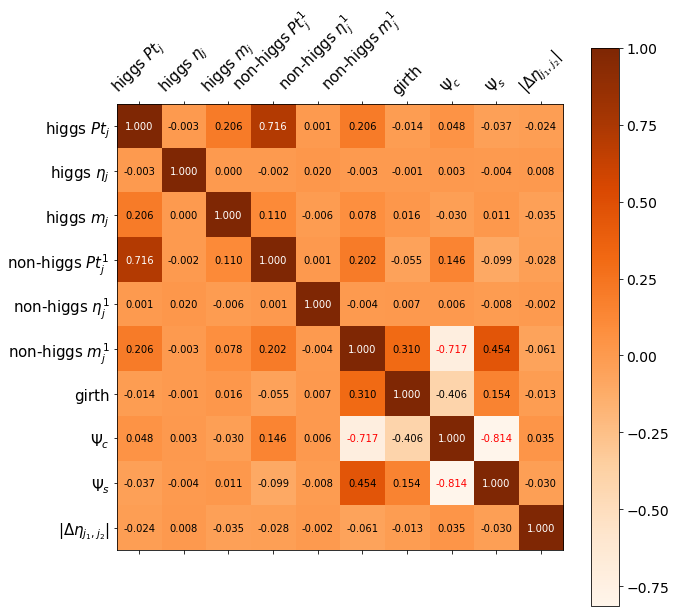

In [8]:
features = ["higgs_pt","higgs_eta","higgs_m",
       "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
      # "non_higgs_subleading_pt","non_higgs_subleading_eta","non_higgs_subleading_m",
       "girth","CIJS","SIJS","DeltaEta"
            ]

df = Data_train[Data_train["isGGH"]==1][features]


namelist = ["higgs $Pt_{j}$","higgs $\eta_{j}$","higgs $m_{j}$",
        "non-higgs $Pt^1_{j}$","non-higgs $\eta^1_{j}$","non-higgs $m^1_{j}$",
        #"non-higgs $Pt^2_{j}$","non-higgs $\eta^2_{j}$","non-higgs $m^2_{j}$",
        "girth","$\Psi_c$","$\Psi_s$","$|\Delta\eta_{j_1, j_2}|$"]

s = len(namelist)
f = plt.figure(figsize=(s, s))

plt.matshow(df.corr(),fignum=f.number, cmap="Oranges")
plt.xticks(range(df.shape[1]), namelist, fontsize=15, rotation=45)
plt.yticks(range(df.shape[1]), namelist, fontsize=15)
plt.ylim((9.5,-0.5))
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16)
for (i, j), z in np.ndenumerate(df.corr()):
    if z >=0.5:
        colors = "white"
    elif z <= -0.5:
        colors = "red"
    else :
        colors = "black"
    plt.text(j, i, '{:0.3f}'.format(z), ha='center', va='center',fontsize=10,color=colors)
plt.savefig("./Higgs_Pt/correlation_matrix.png", transparent=True)
plt.show()

In [27]:
axis = 0
print(prediction_GBDT_test[0,axis]+prediction_GBDT_test[0,int((axis+1)%4)]+prediction_GBDT_test[0,int((axis+2)%4)]+prediction_GBDT_test[0,int((axis+3)%4)])
print(prediction_GBDT_test[0,axis])
print(prediction_GBDT_test[0,axis]/(prediction_GBDT_test[0,int((axis+1)%4)]+prediction_GBDT_test[0,int((axis+2)%4)]+prediction_GBDT_test[0,int((axis+3)%4)]))


1.0
0.16502787783236142
0.19764477573687012


In [ ]:
# # prediction = clf_1.predict_proba(XX)
# # prediction_2 = clf_5.predict_proba(XX)
# # prediction_3 = clf_10.predict_proba(XX)
# # prediction_4 = onetree_5.predict_proba(XX)
# # prediction_5 = onetree_10.predict_proba(XX)

# axis = 0
# if axis == 0:
#     process = "ggH"
# elif axis == 1:
#     process = "VBF"
# elif axis == 2:
#     process = "VH"
# elif axis == 3:
#     process = "ttH"
    
    
# Xection = np.zeros((4,len(np.load("./BDT_Model/ggh_weight_decay.npy"))))
# Xection[0,:] = np.load("./BDT_Model/ggh_weight_decay.npy")
# Xection[1,:] = np.load("./BDT_Model/vbf_weight_decay.npy")
# Xection[2,:] = np.load("./BDT_Model/vh_weight_decay.npy")
# Xection[3,:] = np.load("./BDT_Model/tth_weight_decay.npy")
# Denominator = Xection[int((axis+1)%4),:]+ Xection[int((axis+2)%4),:]+ Xection[int((axis+3)%4),:]

# discriminator_test = prediction_GBDT_test[:,axis]
# discriminator_train = prediction_GBDT_train[:,axis]

# # discriminator_test = prediction_GBDT_test[:,axis]/ \
# #                 (prediction_GBDT_test[:,int((axis+1)%4)]*((Xection[int((axis+1)%4),:]/Denominator)[0])+ \
# #                  prediction_GBDT_test[:,int((axis+2)%4)]*((Xection[int((axis+2)%4),:]/Denominator)[0])+ \
# #                  prediction_GBDT_test[:,int((axis+3)%4)]*((Xection[int((axis+3)%4),:]/Denominator)[0]))


# # discriminator_train = prediction_GBDT_train[:,axis]/ \
# #                 (prediction_GBDT_train[:,int((axis+1)%4)]*((Xection[int((axis+1)%4),:]/Denominator)[0])+ \
# #                  prediction_GBDT_train[:,int((axis+2)%4)]*((Xection[int((axis+2)%4),:]/Denominator)[0])+ \
# #                  prediction_GBDT_train[:,int((axis+3)%4)]*((Xection[int((axis+3)%4),:]/Denominator)[0]))

# discriminator_test = discriminator_test/(max(discriminator_test))
# discriminator_train = discriminator_train/(max(discriminator_train))


# plt.figure(figsize=(8,8))
# Data = pd.DataFrame()
# Data["target"] = y_test[:,axis]
# # Data["pre"] = prediction_GBDT_test[:,axis]
# Data["pre"] = discriminator_test
# # Data["pre"] = prediction_Ada_test[:,axis]
# inner = Data[Data["target"]==1]
# outter = Data[Data["target"]==0]
# BDTscoreplot = pd.DataFrame({str(process): inner["pre"], 'Others': outter["pre"]}, columns=[str(process), 'Others'])
# plot = BDTscoreplot.plot( kind = 'hist', title = "", legend = True, bins = 150, alpha=0.5,
#                       color=['b','g'],stacked=False,density=1,fontsize=15,ax=plt.gca())

# plot.set_ylabel("$1/\Delta (BDT score)$",fontsize=15)
# plot.set_xlabel("GBDT score",fontsize=15)
# plot.xaxis.set_label_coords(1, -0.1)
# plot.yaxis.set_label_coords(-0.1 , 0.5)
# plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=15)
# # plt.savefig("./Higgs_Pt/BDT_score", transparent=True)
# plt.show()

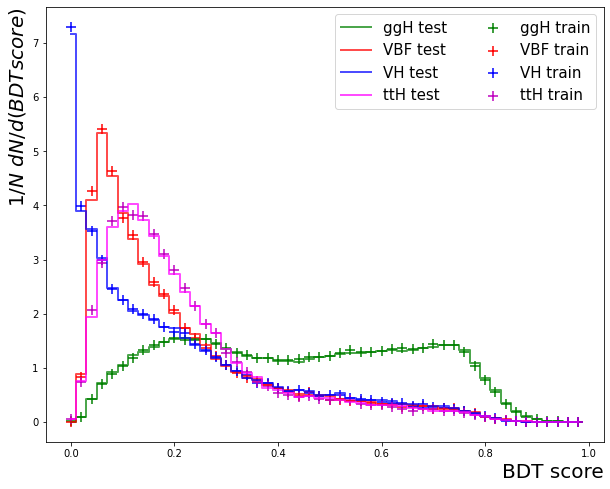

In [46]:
axis = 0
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"
    

xbin = np.linspace(0,1,51)

plt.figure(figsize=(10,8))
Datatest = pd.DataFrame()
Datatest["target"] = Y_test_weighted
Datatest["pre"] = discriminator_test
ggh = Datatest[Datatest["target"]==1]
vbf = Datatest[Datatest["target"]==2]
vh = Datatest[Datatest["target"]==3]
tth = Datatest[Datatest["target"]==4]



ggh_hist, ggh_bins = np.histogram(ggh["pre"], bins=xbin)
plt.step(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,color = "green", where='mid',linewidth=2, alpha=0.7,label="ggH test") 
vbf_hist, vbf_bins = np.histogram(vbf["pre"], bins=xbin)
plt.step(vbf_bins[:-1], vbf_hist.astype(np.float32)/sum(vbf_hist)/0.02 ,color = "red", where='mid',linewidth=2, alpha=0.7,label="VBF test") 
vh_hist, vh_bins = np.histogram(vh["pre"], bins=xbin)
plt.step(vh_bins[:-1], vh_hist.astype(np.float32)/sum(vh_hist)/0.02 ,color = "blue", where='mid',linewidth=2, alpha=0.7,label="VH test") 
tth_hist, tth_bins = np.histogram(tth["pre"], bins=xbin)
plt.step(tth_bins[:-1], tth_hist.astype(np.float32)/sum(tth_hist)/0.02 ,color = "magenta", where='mid',linewidth=2, alpha=0.7,label="ttH test") 



Datatrain = pd.DataFrame()
Datatrain["target"] = Y_train_weighted
Datatrain["pre_train"] = discriminator_train
ggh = Datatrain[Datatrain["target"]==1]
vbf = Datatrain[Datatrain["target"]==2]
vh = Datatrain[Datatrain["target"]==3]
tth = Datatrain[Datatrain["target"]==4]

ggh_hist, ggh_bins = np.histogram(ggh["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,marker = "+",c ="g",s=120,label="ggH train")
vbf_hist, vbf_bins = np.histogram(vbf["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(vbf_bins[:-1], vbf_hist.astype(np.float32)/sum(vbf_hist)/0.02 ,marker = "+",c ="r",s=120,label="VBF train")
vh_hist, vh_bins = np.histogram(vh["pre_train"], bins=xbin)
plt.scatter(vh_bins[:-1], vh_hist.astype(np.float32)/sum(vh_hist)/0.02 ,marker = "+",c ="b",s=120,label="VH train")
tth_hist, tth_bins = np.histogram(tth["pre_train"], bins=xbin)
plt.scatter(tth_bins[:-1], tth_hist.astype(np.float32)/sum(tth_hist)/0.02 ,marker = "+",c ="m",s=120,label="ttH train")


# plt.xlim(0,1)
plt.xlabel("BDT score", fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=20,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=15)
# plt.savefig("./Higgs_Pt/BDT_score_seperate", transparent=True)
plt.show()

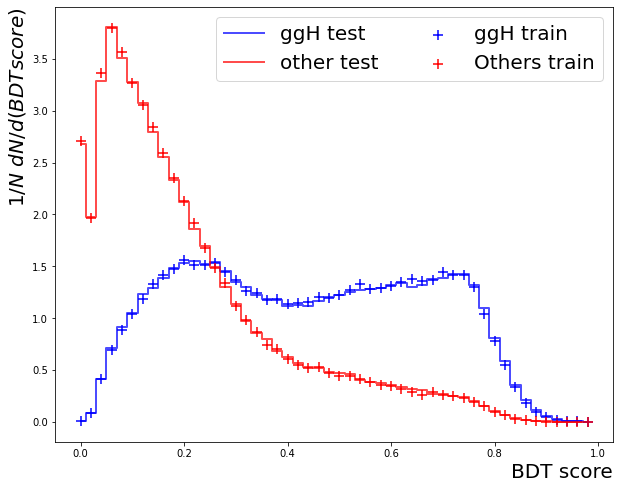

In [47]:
axis = 0
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"

xbin = np.linspace(0,1,51)

plt.figure(figsize=(10,8))
Datatest = pd.DataFrame()
Datatest["target"] = to_categorical(Y_test_weighted-1)[:,axis]
Datatest["pre"] = discriminator_test
inner = Datatest[Datatest["target"]==1]
outter = Datatest[Datatest["target"]==0]

ggh_hist, ggh_bins = np.histogram(inner["pre"], bins=xbin)
plt.step(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,color = "blue", where='mid',linewidth=2, alpha=0.7,label="ggH test") 
other_hist, other_bins = np.histogram(outter["pre"], bins=xbin)
plt.step(other_bins[:-1], other_hist.astype(np.float32)/sum(other_hist)/0.02 ,color = "red", where='mid',linewidth=2, alpha=0.7,label="other test") 


Datatrain = pd.DataFrame()
Datatrain["target"] = to_categorical(Y_train_weighted-1)[:,axis]
Datatrain["pre_train"] = discriminator_train
inner = Datatrain[Datatrain["target"]==1]
outter = Datatrain[Datatrain["target"]==0]

ggh_hist, ggh_bins = np.histogram(inner["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(ggh_bins[:-1], ggh_hist.astype(np.float32)/sum(ggh_hist)/0.02 ,marker = "+",c ="b",s=120,label="ggH train")
other_hist, other_bins = np.histogram(outter["pre_train"], bins=xbin)  #*ggh_new_weight[1]*0.5824
plt.scatter(other_bins[:-1], other_hist.astype(np.float32)/sum(other_hist)/0.02 ,marker = "+",c ="r",s=120,label="Others train")


# plt.xlim(0,10)
plt.xlabel("BDT score", fontsize=20,horizontalalignment='right',x=1)
plt.ylabel("$1/N\,\,dN/d (BDT score)$",fontsize=20,horizontalalignment='right',y=1)
plt.legend(bbox_to_anchor=(1, 1),ncol=2,fontsize=20)
# plt.savefig("./Higgs_Pt/BDT_score", transparent=True)
plt.show()

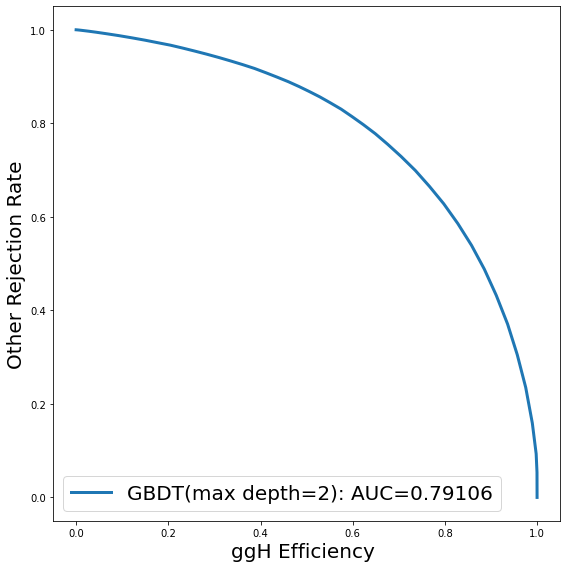

In [50]:
Datatest = pd.DataFrame()
Datatest["target"] = Y_test_weighted
Datatest["pre"] = discriminator_test
ggh_test = Datatest[Datatest["target"]==1]
vbf_test = Datatest[Datatest["target"]==2]
vh_test = Datatest[Datatest["target"]==3]
tth_test = Datatest[Datatest["target"]==4]
other_test = Datatest[Datatest["target"]!=1]

ggh_hist, ggh_bins = np.histogram(ggh_test["pre"], bins=xbin)
# ggh_hist = ggh_hist/len(ggh)*ggh_weight[2][0]*300*1000
# vbf_hist, vbf_bins = np.histogram(vbf_test["pre"], bins=xbin)
# vbf_hist = vbf_hist/len(vbf)*vbf_weight[2][0]*300*1000
# vh_hist, vh_bins = np.histogram(vh_test["pre"], bins=xbin)
# vh_hist = vh_hist/len(vh)*vh_weight[2][0]*300*1000
# tth_hist, tth_bins = np.histogram(tth_test["pre"], bins=xbin)
# tth_hist = tth_hist/len(tth)*tth_weight[2][0]*300*1000
# other_hist = vbf_hist+vh_hist+tth_hist
# other_bins = vbf_bins

other_hist, other_bins = np.histogram(other_test["pre"], bins=xbin)



# other_hist, other_bins = np.histogram(other_test["pre"], bins=xbin)


ggh_efficiency, bkg_efficiency = [], []
for i in range(len(ggh_bins)):
    ggh_efficiency.append(1-sum(ggh_hist[:i])/sum(ggh_hist))
    bkg_efficiency.append(sum(other_hist[:i])/sum(other_hist))
    
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.plot(ggh_efficiency,bkg_efficiency, linewidth = 3, label='GBDT(max depth=2): AUC={0:.5f}'.format(test_auc_GBDT_test))

plt.ylabel('Other Rejection Rate',fontsize=20)
plt.xlabel(str(process)+' Efficiency ',fontsize=20)
plt.legend(ncol=1,fontsize=20) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

# plt.savefig("./Higgs_Pt/Comparison_ROC", transparent=True)
plt.show()


In [13]:
Data_test["prediction"] = discriminator_test
Data_test.to_csv(path_test + "Data_train_w_pre_800.csv",index = 0)

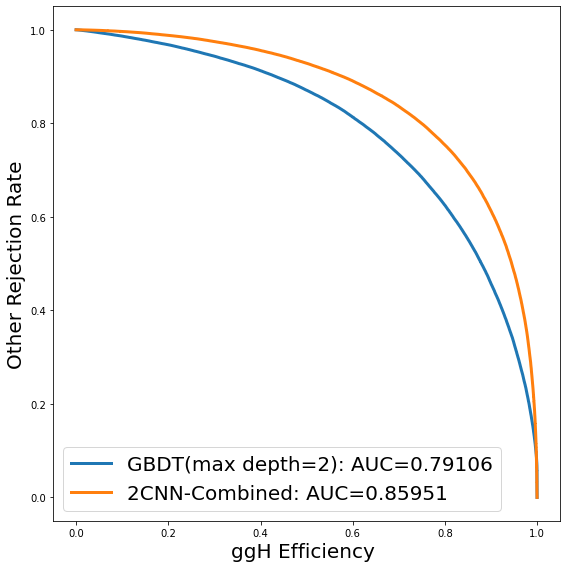

In [53]:
axis = 0
if axis == 0:
    process = "ggH"
elif axis == 1:
    process = "VBF"
elif axis == 2:
    process = "VH"
elif axis == 3:
    process = "ttH"
    

prediction_GBDT_test = clf_GBDT.predict_proba(X_test_weighted)
prediction_2CNN_test = data_test["pre_2CNN_out1"]

# enc = preprocessing.LabelBinarizer()
# y_test = enc.fit_transform(YY)
# y_train = enc.fit_transform(Y)

# y_test = to_categorical(Y_test-1)
# y_train = to_categorical(Y_train-1)

y_test = to_categorical(Y_test_weighted-1)

test_auc_GBDT_test = metrics.roc_auc_score(y_test[:,axis],prediction_GBDT_test[:,axis])
test_auc_2CNN_test = metrics.roc_auc_score(y_test[:,axis],prediction_2CNN_test)

FalsePositiveFull_GBDT_test, TruePositiveFull_GBDT_test, _ = metrics.roc_curve(y_test[:,axis],prediction_GBDT_test[:,axis])
FalsePositiveFull_2CNN_test, TruePositiveFull_2CNN_test, _ = metrics.roc_curve(y_test[:,axis],prediction_2CNN_test)

fig, ax = plt.subplots(1,1, figsize=(8,8))
plt.plot(TruePositiveFull_GBDT_test,1-FalsePositiveFull_GBDT_test, linewidth = 3, label='GBDT(max depth=2): AUC={0:.5f}'.format(test_auc_GBDT_test))
plt.plot(TruePositiveFull_2CNN_test,1-FalsePositiveFull_2CNN_test, linewidth = 3,label='2CNN-Combined: AUC={0:.5f}'.format(test_auc_2CNN_test))



plt.ylabel('Other Rejection Rate',fontsize=20)
plt.xlabel(str(process)+' Efficiency ',fontsize=20)
plt.legend(ncol=1,fontsize=20) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

plt.savefig("./Higgs_Pt/Comparison_ROC.pdf", transparent=True)
plt.show()